In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

In [2]:
df = pd.read_csv('classification_dataset.csv')
df.head()

,density_per_km,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,precipMM,pressure,visibility,winddirDegree,year,month,Target
0,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
1,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
2,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,1
3,12625.800781,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,0.0,1018,10,189,2016,3,0
4,12625.800781,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,0.0,1025,10,99,2016,3,0


In [3]:
df.shape

(155223, 19)

In [4]:
df.Target.value_counts()

0    89843
1    65380
Name: Target, dtype: int64

In [5]:
# Total no of duplicate rows
df.duplicated().sum()

79878

In [6]:
# Remove duplicate rows
df = df.drop_duplicates(keep='first', inplace=False)

In [7]:
df.shape

(75345, 19)

In [8]:
df.Target.value_counts()

0    40734
1    34611
Name: Target, dtype: int64

In [9]:
df.columns

Index(['density_per_km', 'latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month', 'Target'],
      dtype='object')

## Feature Scaling 

In [17]:
feature_scale = [feature for feature in df.columns if feature in ['density_per_km','precipMM']]

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [21]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([df[['Target','latitude', 'longitude', 'maxtempC', 'mintempC',
       'totalSnow_cm', 'sunHour', 'moon_illumination', 'DewPointC',
       'WindGustKmph', 'cloudcover', 'humidity', 'pressure',
       'visibility', 'winddirDegree', 'year', 'month']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(df[feature_scale]), columns=feature_scale)],axis=1)

In [22]:
data.head()

,Target,latitude,longitude,maxtempC,mintempC,totalSnow_cm,sunHour,moon_illumination,DewPointC,WindGustKmph,cloudcover,humidity,pressure,visibility,winddirDegree,year,month,density_per_km,precipMM
0,1,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,0.505636,0.000000
1,0,-34.603684,-58.381559,24,7,0.0,11.6,87,6,16,0,59,1018,10,189,2016,3,0.505636,0.000000
2,0,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,0.505636,0.000000
3,1,-34.603684,-58.381559,22,10,0.0,11.5,76,10,27,34,72,1025,10,99,2016,3,0.505636,0.000000
4,0,-34.603684,-58.381559,22,18,0.0,8.6,26,15,17,61,78,1015,8,105,2016,4,0.505636,0.097011


In [23]:
X = data.iloc[:,1:]  #independent columns
y = data['Target'] #dependent column

## 1. ExtraTreesClassifier

In [24]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [25]:
model.feature_importances_

array([0.14975073, 0.16378022, 0.04930572, 0.05853763, 0.00086377,
       0.03347137, 0.03133483, 0.05940192, 0.03656042, 0.03404514,
       0.04021152, 0.03378388, 0.02144773, 0.04121957, 0.04258147,
       0.05374269, 0.12030346, 0.02965792])

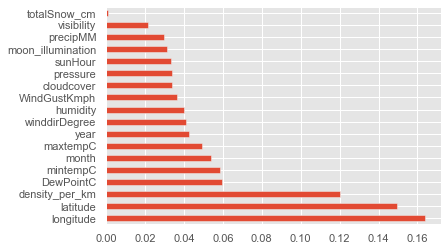

In [26]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.show()

In [27]:
print(feat_importances.nlargest(24))

longitude            0.163780
latitude             0.149751
density_per_km       0.120303
DewPointC            0.059402
mintempC             0.058538
month                0.053743
maxtempC             0.049306
year                 0.042581
winddirDegree        0.041220
humidity             0.040212
WindGustKmph         0.036560
cloudcover           0.034045
pressure             0.033784
sunHour              0.033471
moon_illumination    0.031335
precipMM             0.029658
visibility           0.021448
totalSnow_cm         0.000864
dtype: float64


## 2. Infromation gain

In [28]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X,y)

In [29]:
mutual_data = pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

latitude             0.104773
longitude            0.104288
density_per_km       0.101014
mintempC             0.013141
DewPointC            0.010026
year                 0.008964
maxtempC             0.007672
moon_illumination    0.007609
sunHour              0.005433
humidity             0.003632
winddirDegree        0.003039
month                0.003038
WindGustKmph         0.002997
pressure             0.002653
cloudcover           0.002396
visibility           0.002250
totalSnow_cm         0.000000
precipMM             0.000000
dtype: float64

<AxesSubplot:>

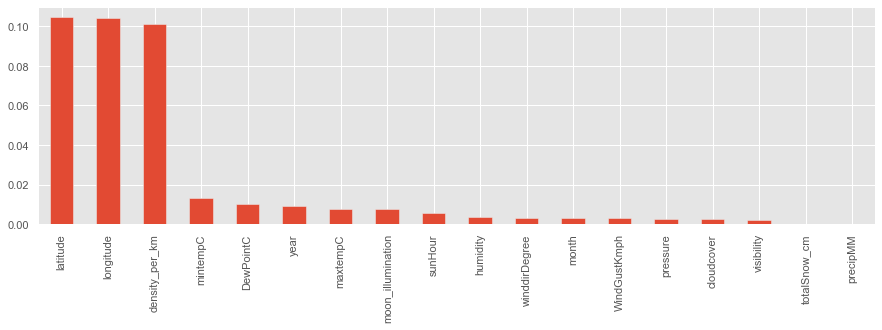

In [30]:
mutual_data.sort_values(ascending=False).plot.bar(figsize=(15,4))

In [34]:
from sklearn.feature_selection import SelectKBest
select_col = SelectKBest(mutual_info_classif,k=18)
select_col.fit(X,y)
X.columns[select_col.get_support()]

Index(['latitude', 'longitude', 'maxtempC', 'mintempC', 'totalSnow_cm',
       'sunHour', 'moon_illumination', 'DewPointC', 'WindGustKmph',
       'cloudcover', 'humidity', 'pressure', 'visibility', 'winddirDegree',
       'year', 'month', 'density_per_km', 'precipMM'],
      dtype='object')

## 3. XGBoost

[18:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.14599492 0.12934968 0.04681162 0.06445178 0.02328847 0.01547733
 0.02979491 0.19788662 0.02133213 0.01536394 0.03087363 0.02012367
 0.0119604  0.01956591 0.07547031 0.05559333 0.07948454 0.01717684]


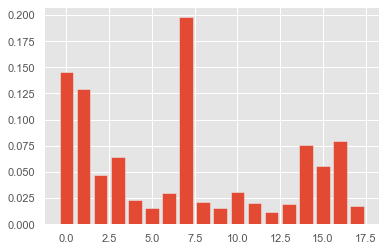

In [35]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# feature importance
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [36]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)

DewPointC            0.197887
latitude             0.145995
longitude            0.129350
density_per_km       0.079485
year                 0.075470
mintempC             0.064452
month                0.055593
maxtempC             0.046812
humidity             0.030874
moon_illumination    0.029795
totalSnow_cm         0.023288
WindGustKmph         0.021332
pressure             0.020124
winddirDegree        0.019566
precipMM             0.017177
sunHour              0.015477
cloudcover           0.015364
visibility           0.011960
dtype: float32

<AxesSubplot:>

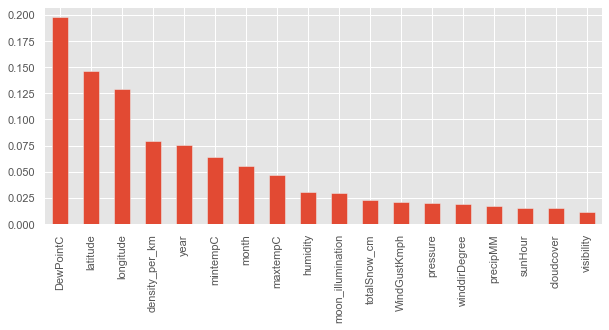

In [37]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.sort_values(ascending=False)
feat_importance.sort_values(ascending=False).plot.bar(figsize=(10,4))

In [38]:
len(df.columns)

19